In [1]:
import pandas as pd
import pingouin as pg

resultsfilename = "data_stats-outliers-replaced.csv"
st = pd.read_csv(resultsfilename)
print("Loading", len(st), "lines of stats.")



Loading 876 lines of stats.


# Study ID: 2, study type: lexical, font: arial (designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,63,0.261,"[0.01, 0.48]",0.068,0.037,0.038561,1.274,0.55


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,63,6,-0.079,"[-0.32, 0.17]",0.006,-0.027,0.559916,0.094




# Study ID: 2, study type: lexical, font: sansforgetica (designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,63,0.191,"[-0.06, 0.42]",0.036,0.004,0.134736,0.469,0.324


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,63,5,-0.078,"[-0.32, 0.17]",0.006,-0.027,0.559982,0.093




# Study ID: 2, study type: recognition, font: arial (designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,63,0.348,"[0.11, 0.55]",0.121,0.092,0.005144,7.208,0.809


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,63,3,0.042,"[-0.21, 0.29]",0.002,-0.031,0.747486,0.062




# Study ID: 2, study type: recognition, font: sansforgetica (designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,63,0.34,"[0.1, 0.54]",0.116,0.086,0.006428,5.924,0.788


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,63,6,0.375,"[0.14, 0.57]",0.14,0.112,0.004072,0.867




# Study ID: 2, study type: lexical, font: arial (non-designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,59,-0.283,"[-0.5, -0.03]",0.08,0.047,0.029825,1.625,0.592


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,59,6,-0.155,"[-0.4, 0.1]",0.024,-0.011,0.266333,0.219




# Study ID: 2, study type: lexical, font: sansforgetica (non-designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,59,-0.071,"[-0.32, 0.19]",0.005,-0.03,0.59186,0.187,0.083


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,59,4,0.101,"[-0.16, 0.35]",0.01,-0.025,0.463789,0.119




# Study ID: 2, study type: recognition, font: arial (non-designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,59,-0.065,"[-0.32, 0.19]",0.004,-0.031,0.626449,0.182,0.077


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,59,4,-0.104,"[-0.35, 0.16]",0.011,-0.024,0.448636,0.123




# Study ID: 2, study type: recognition, font: sansforgetica (non-designers only)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,59,0.107,"[-0.15, 0.35]",0.011,-0.024,0.419899,0.223,0.128


,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,59,4,0.038,"[-0.22, 0.29]",0.001,-0.034,0.784874,0.059


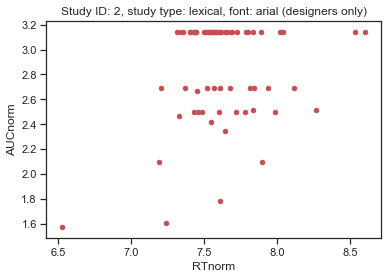

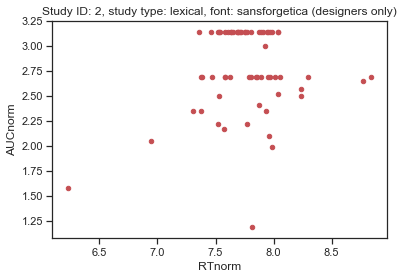

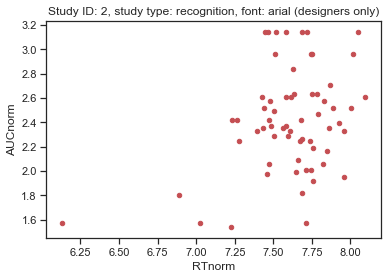

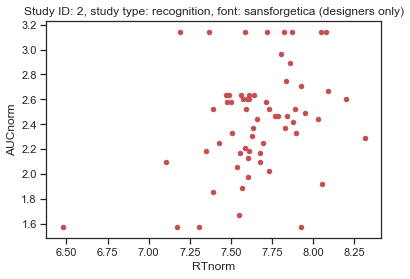

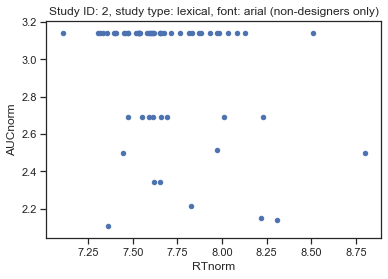

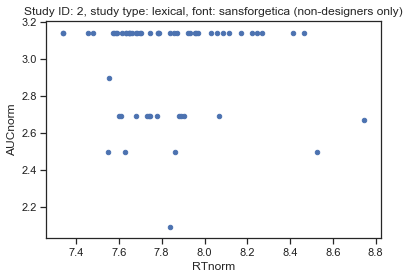

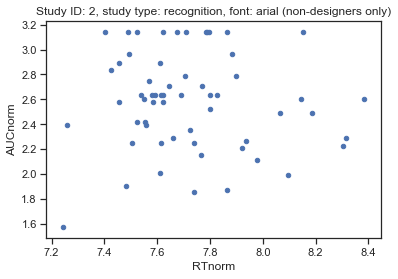

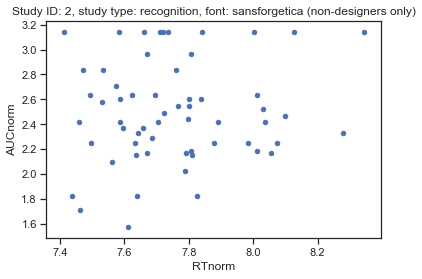

In [23]:
sid = 2
for isDesigner in [True, False]:
    designer_txt = ["non-designers", "designers"][isDesigner]
    designer_col = ["B", "R"][isDesigner]
    for t in ["lexical", "recognition"]:
        for font in ["arial", "sansforgetica"]:
            title = "Study ID: %s, study type: %s, font: %s (%s only)" % (sid, t, font, designer_txt)
            print("# " + title)
            group = st[(st["isDesigner"] == isDesigner) &  (st["Font"] == font) & (st["Type"] == t) & (st["StudyID"] == sid)]
            display(pg.corr(group["RTnorm"], group["AUCnorm"]))
            display(pg.corr(group["RTnorm"], group["AUCnorm"], method="shepherd"))
            group.plot(x="RTnorm", y="AUCnorm", kind="scatter", color=designer_col, title=title)
            print()
            print()